<a href="https://colab.research.google.com/github/rht6226/DL/blob/main/Opportunity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the preprocessed datasets

In [ ]:
import numpy as np
from keras.utils import to_categorical
import json
import matplotlib

In [ ]:
class OpportunityDataset:
    def __init__(self, filepath):
        with np.load(filepath + 'training.npz') as data:
            self.trainX = data['X']
            
            self.trainy = to_categorical(data['y']-1)
            
        with np.load(filepath + 'test.npz') as data:
            self.testX = data['X']
            self.testy = to_categorical(data['y']-1)

        with open(filepath + 'classes.json') as classes:
            self.labels=json.load(classes)

        self.trainX = self.trainX.reshape((self.trainX.shape[0], self.trainX.shape[1], 1))
        self.testX = self.testX.reshape((self.testX.shape[0], self.testX.shape[1], 1))
    
    def summary(self):
        print("Opportunity Human Activity Recognition Dataset: ")
        print("Shape of training data = X:{}, y: {}".format(self.trainX.shape, self.trainy.shape))
        print("Shape of testing data = X:{}, y: {}".format(self.testX.shape, self.testy.shape))
        # print("Shape of validation data = X:{}, y: {}".format(self.validateX.shape, self.validatey.shape))
        print("Number of available labels for classification : {}".format(len(self.labels)))

In [ ]:
opp = OpportunityDataset(filepath='/content/drive/My Drive/HAR Processed Data/Opportunity2/')
opp.summary()

Opportunity Human Activity Recognition Dataset: 
Shape of training data = X:(165465, 242, 1), y: (165465, 18)
Shape of testing data = X:(64092, 242, 1), y: (64092, 18)
Number of available labels for classification : 18


# Training on 1D CNN

In [ ]:
import keras
from keras import regularizers
from keras.models import Sequential
from keras.layers import MaxPooling1D, Conv1D, Flatten, Dense, Concatenate, GRU, Input, Dropout, concatenate
from keras.utils.vis_utils import plot_model

In [ ]:
def get_1DCNN_model(trainX, trainy, testX, testy):
    features, n_outputs = trainX.shape[1], trainy.shape[1]

    # Model Definitions
    model = Sequential()

    model.add(Conv1D(filters=32, kernel_size=3, 
                     activation='relu', padding='same', input_shape=(features, 1), 
                     ))
    
    model.add(Conv1D(filters=64, kernel_size=1,
                     padding='same', activation='relu', 
                     ))
    
    
    model.add(Dropout(0.5))
    
    model.add(MaxPooling1D(pool_size=2))
    

    model.add(Conv1D(filters=48, kernel_size=5, 
                     padding='same', activation='relu'
                     ))
    
    model.add(Conv1D(filters=36, kernel_size=3, activation='relu', 
                     ))
    
    model.add(Dropout(0.5))
    
    model.add(MaxPooling1D(pool_size=2))

    model.add(Conv1D(filters=24, kernel_size=7, activation='relu'
                     ))
    

    model.add(Flatten())


    model.add(Dense(400, activation='relu', 
                    kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), 
                    bias_regularizer=regularizers.l2(1e-4), 
                    activity_regularizer=regularizers.l2(1e-5), 
                    ))
    
    model.add(Dense(70, activation='relu', 
                    kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), 
                    bias_regularizer=regularizers.l2(1e-4), 
                    activity_regularizer=regularizers.l2(1e-5), 
                    ))
    
    model.add(Dropout(0.5))
    
    model.add(Dense(n_outputs, activation='softmax', 
                    kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4), 
                    bias_regularizer=regularizers.l2(1e-4), 
                    activity_regularizer=regularizers.l2(1e-5), 
                    ))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Print stuff
    print(model.summary())
    return model

In [ ]:
model_1D_CNN = get_1DCNN_model(opp.trainX, opp.trainy, opp.testX, opp.testy)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 242, 32)           128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 242, 64)           2112      
_________________________________________________________________
dropout (Dropout)            (None, 242, 64)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 121, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 121, 48)           15408     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 119, 36)           5220      
_________________________________________________________________
dropout_1 (Dropout)          (None, 119, 36)           0

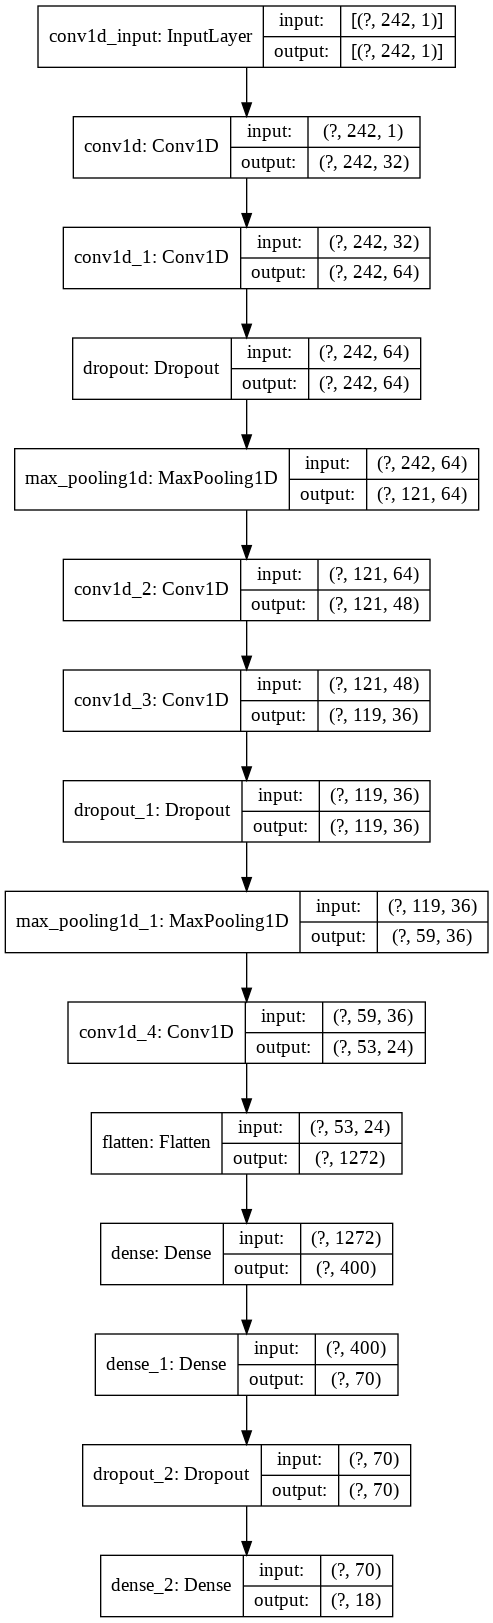

In [ ]:
plot_model(model_1D_CNN, show_shapes=True, show_layer_names=True)

In [ ]:
verbose, epochs, batch_size = 0, 40, 32
history_1D_CNN_UCI = model_1D_CNN.fit(opp.trainX, opp.trainy, epochs=epochs, verbose=1, batch_size=batch_size, validation_data=(opp.testX, opp.testy))

Epoch 1/40
5171/5171 [==============================] - 279s 54ms/step - loss: 0.7969 - accuracy: 0.7850 - val_loss: 0.6223 - val_accuracy: 0.8556
Epoch 2/40
5171/5171 [==============================] - 278s 54ms/step - loss: 0.5239 - accuracy: 0.8558 - val_loss: 0.6703 - val_accuracy: 0.8513
Epoch 3/40
5171/5171 [==============================] - 284s 55ms/step - loss: 0.4509 - accuracy: 0.8862 - val_loss: 0.7406 - val_accuracy: 0.8567
Epoch 4/40
5171/5171 [==============================] - 284s 55ms/step - loss: 0.4134 - accuracy: 0.9028 - val_loss: 0.8318 - val_accuracy: 0.8533
Epoch 5/40
5171/5171 [==============================] - 294s 57ms/step - loss: 0.3934 - accuracy: 0.9131 - val_loss: 0.7413 - val_accuracy: 0.8636
Epoch 6/40
5171/5171 [==============================] - 297s 57ms/step - loss: 0.3759 - accuracy: 0.9189 - val_loss: 0.7689 - val_accuracy: 0.8576
Epoch 7/40
5171/5171 [==============================] - 291s 56ms/step - loss: 0.3660 - accuracy: 0.9230 - val_loss: 0

In [ ]:
model_1D_CNN.save('/content/drive/My Drive/Colab Notebooks/Models/1D_CNN_OPP.h5')

# Plotting

In [ ]:
# Plotting Loss and Accuracy

import matplotlib.pyplot as plt

def plot_model_accuracy(details, history, figureSize=[8, 8]):
    matplotlib.rcParams['figure.figsize'] = figureSize
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy for {}'.format(details))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

def plot_model_loss(details, history, figureSize=[8, 8]):
    matplotlib.rcParams['figure.figsize'] = figureSize
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss for {}'.format(details))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

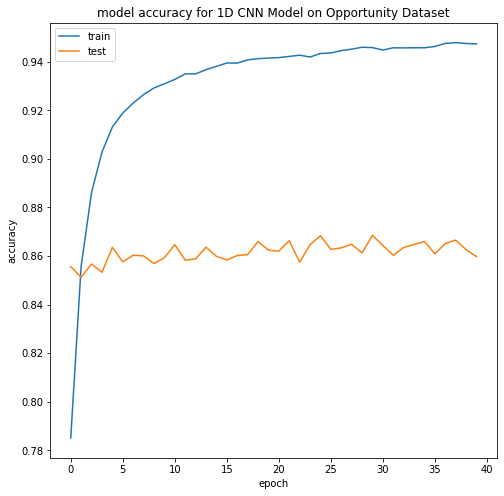

In [ ]:
plot_model_accuracy("1D CNN Model on Opportunity Dataset", history=history_1D_CNN_UCI)

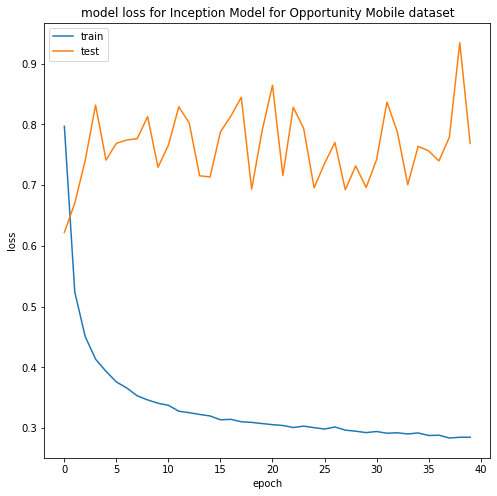

In [ ]:
plot_model_loss("Inception Model for Opportunity Mobile dataset", history=history_1D_CNN_UCI)

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
def plot_cm(predictedY, testy, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues, figureSize=[10, 10]):
    matplotlib.rcParams['figure.figsize'] = figureSize
    # Predict Y, And get Confusion Matrix
    predictedY = np.argmax(predictedY, axis = 1)
    testy = np.argmax(testy, axis=1)
    cm = confusion_matrix(y_true=testy, y_pred=predictedY)

    # Plotting
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


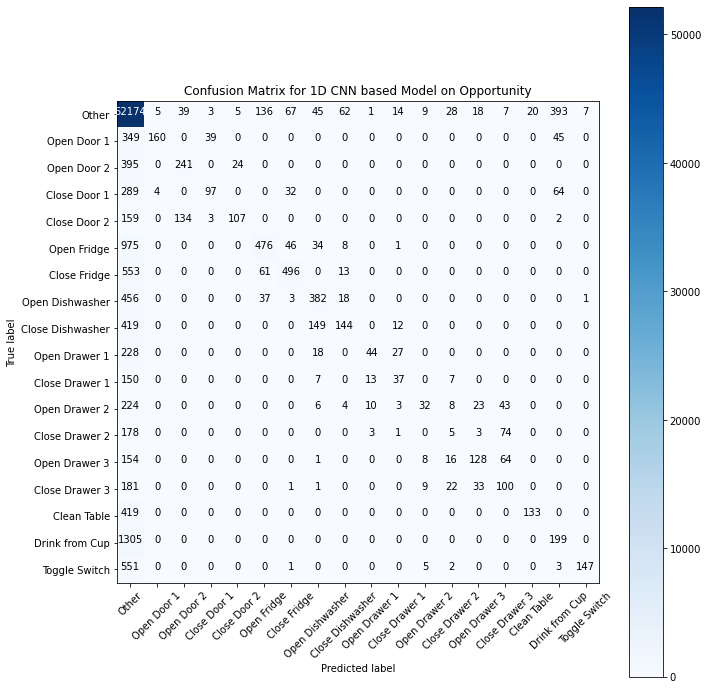

In [ ]:
# CNN Based Network
predictedY = model_1D_CNN.predict(opp.testX)
cm_plot_labels = opp.labels
plot_cm(predictedY, testy=opp.testy, classes=cm_plot_labels, title='Confusion Matrix for 1D CNN based Model on Opportunity')

Confusion matrix, without normalization


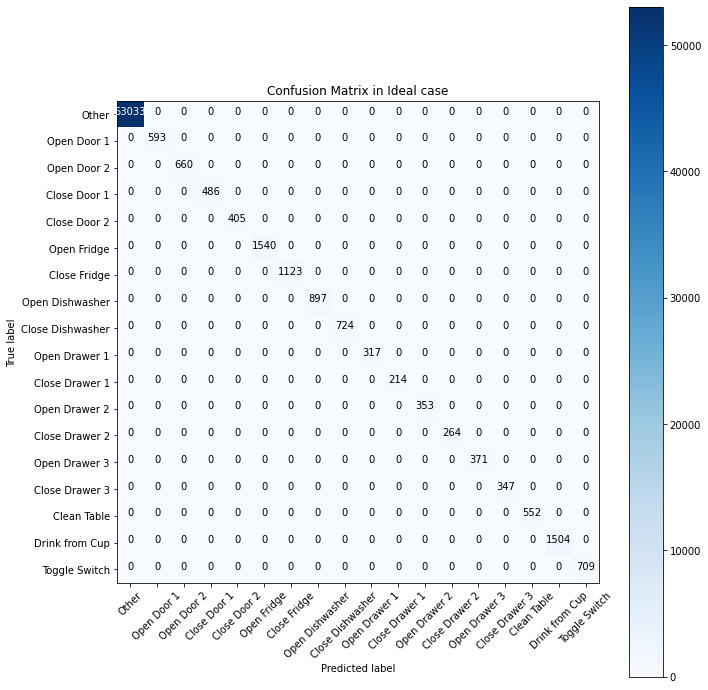

In [ ]:
plot_cm(opp.testy, testy=opp.testy, classes=cm_plot_labels, title='Confusion Matrix in Ideal case')